# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
#imports 
import pandas as pd 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
df = pd.read_csv('wholesale_data.csv')
#import data from csv and check for missing values and fill them using mean

imputer = SimpleImputer(strategy='mean')
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
imputed_df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [3]:
#get description of data and review it 
data_info = imputed_df.describe()
data_info


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


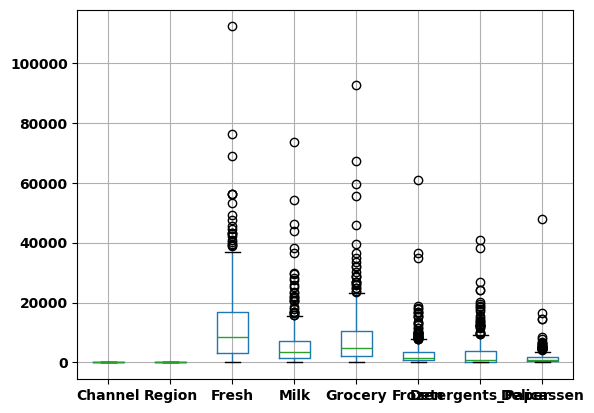

In [4]:
# do some EDA to futher review data 
imputed_df.boxplot()
plt.show()

c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


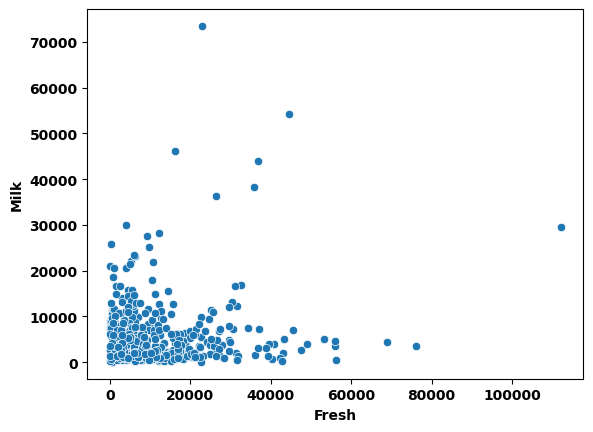

In [5]:
sns.scatterplot(data=imputed_df, x='Fresh', y='Milk')
plt.show()

In [6]:
# check for outliers using the IQR technique 
q1 = imputed_df.quantile(0.25)
q3 = imputed_df.quantile(0.75)

IQR = q3 - q1 

outliers = ((imputed_df<(q1 - 1.5 * IQR))|(imputed_df > (q3+1.5 * IQR))).sum()

outliers
#there are some outliers in the data 

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

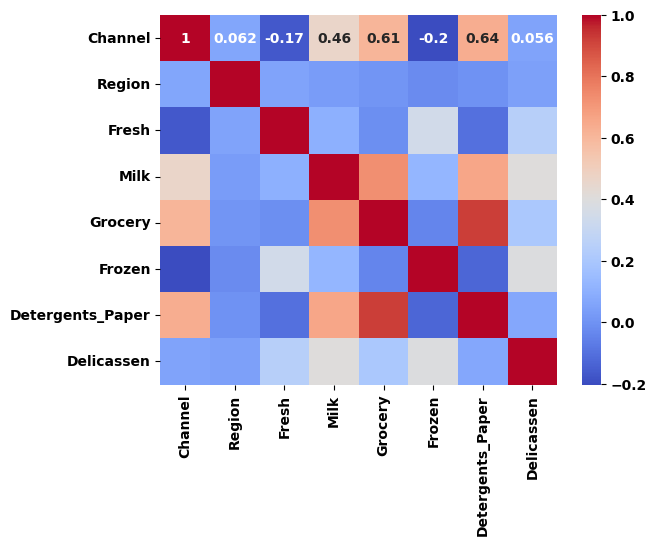

In [7]:
#look at correlations between each feature 
corr_matrix = imputed_df.corr()
corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
#scale data to use for PCA model 
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(imputed_df), columns=imputed_df.columns)
scaled_df.shape

(440, 8)

In [9]:
#feature selectio using PCA model 
pca1 = PCA(n_components=2)
pca1.fit(scaled_df)
principal_components = pca1.transform(scaled_df)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [10]:
#figure out optimal amont of clusters using elbow method and sillhouette score 
wcss = []
silhouette_score_s = []
range_values = (2,11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    #make sure there are two data points per cluster
    if len(scaled_df) // i >1:
        silhouette_score_s.append(silhouette_score(scaled_df, kmeans.labels_))


c:\Users\IRC-240\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\IRC-240\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\IRC-240\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\IRC-240\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

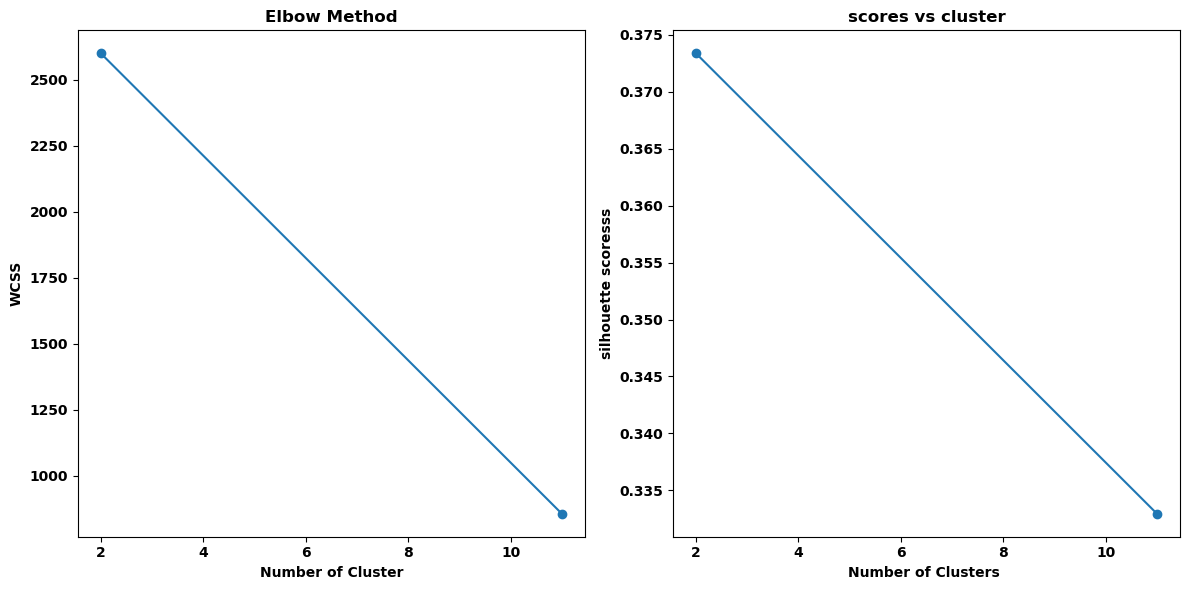

In [11]:
#plot elbow and silhouettes score
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range_values, silhouette_score_s, marker='o')
plt.title('scores vs cluster')
plt.xlabel('Number of Clusters ')
plt.ylabel('silhouette scoresss')

plt.tight_layout()
plt.show()



In [12]:
#select optimal number of clusters 
optimal_clusters = np.argmax(silhouette_score_s)+ 2 



In [13]:
#perform kmeans clustering 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_df)


c:\Users\IRC-240\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\IRC-240\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
#add cluster info to the orig dataframe 
df['clusters'] = clusters

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [15]:
#imports 
from scipy.cluster.hierarchy import dendrogram, linkage


In [16]:
#standardize the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)



In [17]:
#use linkage ward method to perform clustering (ward is used to minimize variance)
link = linkage(df_scaled, method='ward') 


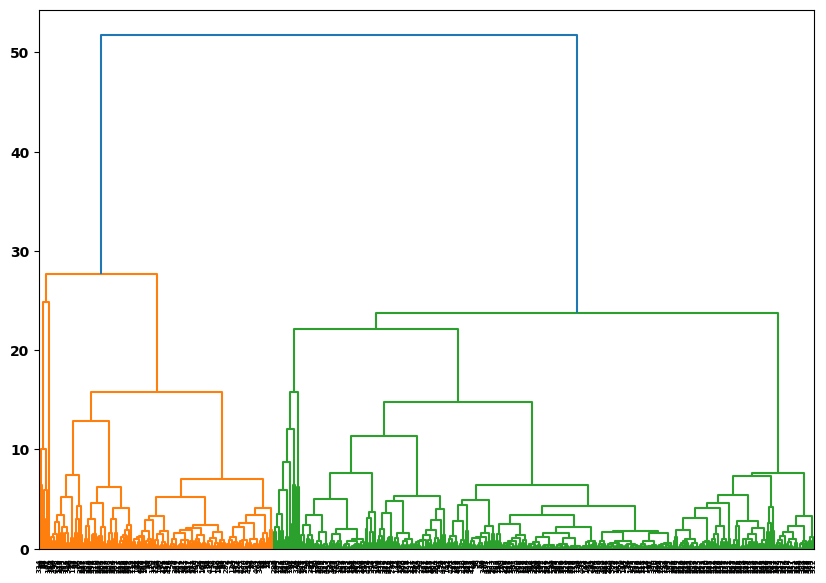

In [18]:
#plot dendogram using pyplot
plt.figure(figsize=(10,7))
dendrogram(link, orientation='top', labels=range(1,len(df)+1), distance_sort='descending', show_leaf_counts=True)

plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [19]:
#start PCA and define it, set components to none so all components are kept 

pca2 = PCA(n_components=None, random_state=42)
#apply defined pca to scaled data from above 
pca2.fit(df_scaled)

PCA(random_state=42)

In [20]:
#calculate explained var ratio for each principle component 
exp_var_ratio = pca2.explained_variance_ratio_


In [21]:
# get the cumulative variance ratio 
cum_exp_var_ratio = pca2.explained_variance_ratio_.cumsum()


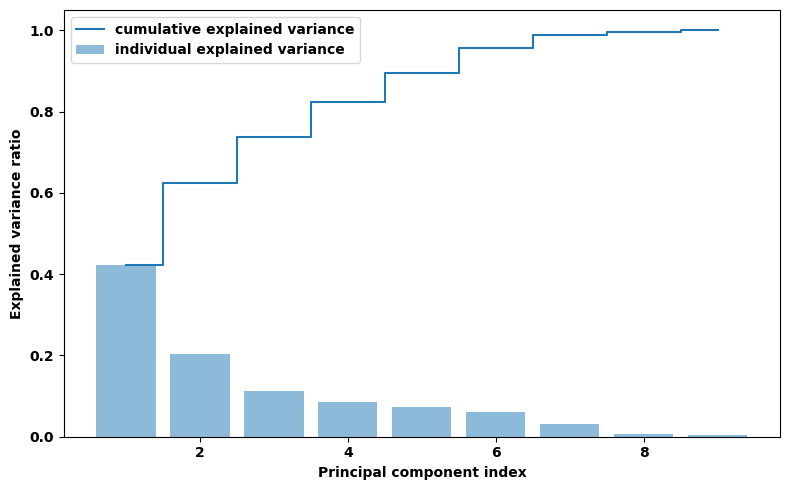

In [22]:
#Plot it using pyplot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_exp_var_ratio) + 1), cum_exp_var_ratio, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1 in the scatter plot above it seems taht there is a cluster towards the bottom of the two axis which tells me that customers spend less on both fresh and milk products, there some outliers but the pattern shows that more money is spend elsewhere 

2 Based on the correlation matrix above, there is a strong correlation between grocery  and detergent paper this may indicate that these things are purchased together often 

3 Based on the principal componenet chart, it shows that the first component has the most variance compared to the rest of the components and the last 2-3 components have a small variance and diminishing return, based on this you may want to only use the first few components if doing further analysis 

4 based on the dendogram it seems like there are two distinct clusters since there is a large vertical line that doesnt intersent with horizontal lines, moreover the distances between the two lines indicates that they are distinctive groups with most of the variance as shown later from the PCA model 
